## Imports

In [3]:
import torch
import torch.nn as nn
import scipy.stats as stats
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchviz import make_dot
from torch import optim


from icnnet import ICNNet
from mydataset import MyDataset
import toy_data_dataloader_gaussian


## Toy data


In [2]:
dataloader = toy_data_dataloader_gaussian.get_dataloader()

## Training

### PICNN training

In [4]:
epochs = 50

# Initialize the model
model = ICNNet(input_size=2, layer_sizes = [2,4,2], context_layer_sizes=[2,2,2])
model.train()

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    for x_batch, c_batch, y_batch in dataloader:
        x_batch.requires_grad_(True)
        c_batch.requires_grad_(True)

        optimizer.zero_grad() # Zero the gradients
        
        output = model(x_batch, c_batch)  # Assuming context c is same as input x

        loss = criterion(output, y_batch) # Compute the loss
        loss.backward() # Backward pass

        optimizer.step() # Update the parameters
        # for layers_k in model.layers_z:
        #     for param in layers_k.parameters():
        #         param.data.clamp_min_(0)
        
        #pass

    #for name, parameter in model.named_parameters():
        #if parameter.requires_grad and parameter.grad is not None:
            #grad_norm = parameter.grad.norm().item()
            #print(f"Gradient norm for {name}: {grad_norm}")

    print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item()}")




Epoch 1/50 Loss: 27.066930770874023
Epoch 2/50 Loss: 20.302471160888672
Epoch 3/50 Loss: 17.91814613342285
Epoch 4/50 Loss: 19.700496673583984
Epoch 5/50 Loss: 16.446422576904297
Epoch 6/50 Loss: 14.33407211303711
Epoch 7/50 Loss: 11.035459518432617
Epoch 8/50 Loss: 12.282501220703125
Epoch 9/50 Loss: 10.968561172485352
Epoch 10/50 Loss: 9.695143699645996
Epoch 11/50 Loss: 10.118446350097656
Epoch 12/50 Loss: 7.815341949462891
Epoch 13/50 Loss: 9.341687202453613
Epoch 14/50 Loss: 9.094572067260742
Epoch 15/50 Loss: 9.701265335083008
Epoch 16/50 Loss: 7.999893665313721
Epoch 17/50 Loss: 6.086113929748535
Epoch 18/50 Loss: 7.757827281951904
Epoch 19/50 Loss: 7.527063846588135
Epoch 20/50 Loss: 8.599159240722656
Epoch 21/50 Loss: 7.922767162322998
Epoch 22/50 Loss: 10.079205513000488
Epoch 23/50 Loss: 7.4470391273498535
Epoch 24/50 Loss: 10.077977180480957
Epoch 25/50 Loss: 7.549190521240234
Epoch 26/50 Loss: 11.292055130004883
Epoch 27/50 Loss: 9.006994247436523
Epoch 28/50 Loss: 9.49971

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Suppose 'model' is your PyTorch model
num_parameters = count_parameters(model)

print(f'The model has {num_parameters} parameters')

The model has 88 parameters


tensor([1.8868, 1.8835, 1.8821, 1.8859, 1.8824, 1.8868, 1.8864, 1.8862, 1.8849,
        1.8808, 1.8872, 1.8840, 1.8846, 1.8842, 1.8842, 1.8813, 1.8820, 1.8831,
        1.8846, 1.8835, 1.8865, 1.8866, 1.8811, 1.8837, 1.8873, 1.8842, 1.8844,
        1.8848, 1.8864, 1.8831, 1.8846, 1.8834, 1.8837, 1.8858, 1.8844, 1.8864,
        1.8830, 1.8874, 1.8847, 1.8866, 1.8832, 1.8844, 1.8795, 1.8835, 1.8847,
        1.8841, 1.8860, 1.8826, 1.8860, 1.8851, 1.8830, 1.8854, 1.8839, 1.8862,
        1.8849, 1.8862, 1.8847, 1.8828, 1.8858, 1.8836, 1.8855, 1.8869, 1.8864,
        1.8847, 1.8848, 1.8864, 1.8856, 1.8852, 1.8850, 1.8835, 1.8843, 1.8811,
        1.8827, 1.8850, 1.8851, 1.8855, 1.8858, 1.8840, 1.8851, 1.8855, 1.8831,
        1.8836, 1.8858, 1.8831, 1.8872, 1.8838, 1.8814, 1.8847, 1.8837, 1.8835,
        1.8839, 1.8852, 1.8859, 1.8860, 1.8824, 1.8815, 1.8864, 1.8836, 1.8847,
        1.8803], grad_fn=<SelectBackward0>)

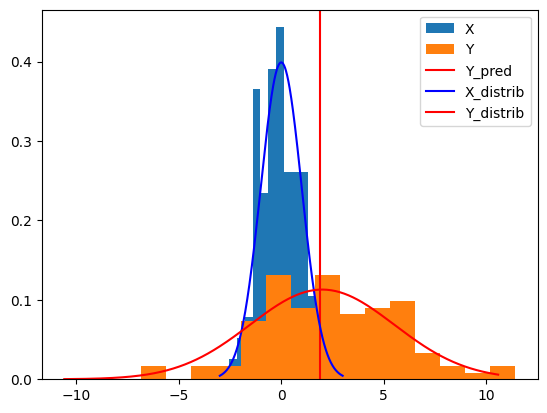

In [109]:
## plot an x 
import matplotlib.pyplot as plt

Y_pred  = model(X, C)[0, :, 0].detach().numpy().mean()

plt.hist(X[0, :, 0],  bins=15, label = 'X', density = True)
plt.hist(Y[0, :, 0],  bins=15, label = 'Y', density = True)
plt.axvline(x = Y_pred, color = 'r', label = 'Y_pred')
plt.plot(np.linspace(-3, 3, 300), stats.norm.pdf(np.linspace(-3, 3, 300), loc=0, scale=1), label = 'X_distrib', color = 'blue')
plt.plot(np.linspace(-3*scales[0, 0], 3*scales[0, 0], 300), stats.norm.pdf(np.linspace(-3*scales[0, 0], 3*scales[0, 0], 300), loc=locs[0, 0], scale=scales[0, 0]), label = 'Y_distrib', color = 'red')

plt.legend()

plt.show()
         





In [12]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for x_batch, c_batch, y_batch in dataloader:
        outputs = model(x_batch, c_batch)
        for result, y in zip(outputs, y_batch) :
            print(result, y)
        break



tensor([0.9659]) tensor([0.9711])
tensor([-0.8608]) tensor([-0.8804])
tensor([-1.5514]) tensor([-1.5494])
tensor([-2.0634]) tensor([-2.0654])
tensor([-0.3589]) tensor([-0.3625])
tensor([-0.0569]) tensor([-0.0557])
tensor([0.2998]) tensor([0.3047])
tensor([0.5297]) tensor([0.5354])
tensor([-0.1235]) tensor([-0.1228])
tensor([0.9448]) tensor([0.9500])
tensor([1.9734]) tensor([1.9713])
tensor([-0.3519]) tensor([-0.3491])
tensor([1.6254]) tensor([1.6264])
tensor([2.1131]) tensor([2.1097])
tensor([1.3164]) tensor([1.3198])
tensor([2.5679]) tensor([2.5597])
tensor([0.2010]) tensor([0.2053])
tensor([1.0198]) tensor([1.0247])
tensor([0.7091]) tensor([0.7148])
tensor([-0.9824]) tensor([-0.9785])
tensor([1.9971]) tensor([1.9948])
tensor([0.9218]) tensor([0.9271])
tensor([0.4286]) tensor([0.4341])
tensor([2.5955]) tensor([2.5870])
tensor([1.0804]) tensor([1.0850])
tensor([-0.4405]) tensor([-0.4374])
tensor([0.6309]) tensor([0.6259])
tensor([-1.2735]) tensor([-1.2702])
tensor([-1.1432]) tensor([-1

### Makkuva

In [14]:
from torch import optim
epochs = 100
train_freq_g = 20

# Initialize the model
input_size = 1
ICNNf = ICNNet(layer_sizes = [input_size, 2,2,2,2,1], context_layer_sizes=[1,2,2,2,2,2])

output_size = 1
ICNNg = ICNNet(layer_sizes = [output_size, 2,2,2,2,1], context_layer_sizes=[1,2,2,2,2,2])

# Define the loss function and the optimizer
optimizer_f = optim.Adam(ICNNf.parameters())
optimizer_g = optim.Adam(ICNNg.parameters())

for epoch in range(epochs):
   
    for _ in range(train_freq_g) :
        for x, c, y in dataloader:
            optimizer_f.zero_grad() # Zero the gradients
            optimizer_g.zero_grad() # Zero the gradients
            x.requires_grad_(True)
            y.requires_grad_(True)
            c.requires_grad_(True)

            output_g = ICNNg(y, c)
            diff_output_g = torch.autograd.grad(output_g, y, grad_outputs=torch.ones_like(output_g), create_graph=True)[0]
            
            loss_g = - torch.matmul(y.transpose(0, 1), diff_output_g) - ICNNf(diff_output_g, c)
            loss_g = torch.mean(loss_g)
            loss_g.backward() # Backward pass

            optimizer_g.step() # Update the parameters
            for layers_k in ICNNg.layers_z:
                for param in layers_k.parameters():
                    param.data.clamp_min_(0)

    for x, c, y in dataloader:
        optimizer_f.zero_grad() # Zero the gradients
        optimizer_g.zero_grad()
        x.requires_grad_(True)
        y.requires_grad_(True)
        c.requires_grad_(True)
        


        output_g = ICNNg(y, c)
        diff_output_g = torch.autograd.grad(outputs=output_g, inputs=y, grad_outputs=torch.ones_like(output_g), create_graph=True)[0]

        loss_f = ICNNf(x, c) - ICNNf(diff_output_g, c)
        loss_f = torch.mean(loss_f)
        loss_f.backward() # Backward pass
        
        for layers_k in ICNNf.layers_z:
                for param in layers_k.parameters():
                    param.data.clamp_min_(0)


        #testing algorithm
        output_g_test = ICNNg(x, c)
        diff_output_g_test = torch.autograd.grad(output_g_test, x, grad_outputs=torch.ones_like(output_g_test), create_graph=True)[0]

        loss_test = diff_output_g_test-y

        #print('y =', y[0], 'diff_output_g =', diff_output_g_test[0])
        
        pass

    print(f"Epoch {epoch+1}/{epochs} loss_g: {loss_g.item()}, loss_f: {loss_f.item()}")

Epoch 1/100 loss_g: -14697.9033203125, loss_f: -26.161470413208008
Epoch 2/100 loss_g: -13241685114880.0, loss_f: -23073417216.0
Epoch 3/100 loss_g: -4.9078584419444326e+17, loss_f: -840131305013248.0


KeyboardInterrupt: 